In [1]:
import isolines as il
import matplotlib.pyplot as plt
%matplotlib inline
from shapely import wkt
from shapely.geometry import *

# Using different type of geometries as location input

In [2]:
poly = 'POLYGON ((34.7789012 32.0723507, 34.7791154 32.0722353, 34.7793334 32.0721058, 34.7795058 32.0720034, 34.7798462 32.0718012, 34.7798952 32.0717779, 34.7799146 32.0717792, 34.7799342 32.0717872, 34.7799749 32.0718304, 34.7800152 32.0718938, 34.7800494 32.0719833, 34.7800951 32.0721526, 34.7801415 32.0721419, 34.7802657 32.0725926, 34.7802395 32.0725983, 34.7802115 32.0726044, 34.7803126 32.0729483, 34.7802872 32.0729538, 34.7800336 32.0730091, 34.7794776 32.0731262, 34.7793901 32.0731446, 34.7793928 32.0731335, 34.7794169 32.0730342, 34.7792506 32.0724367, 34.7792089 32.0724654, 34.7791549 32.0724809, 34.7791208 32.0724538, 34.7790698 32.0724201, 34.7790322 32.0724077, 34.7789862 32.0723998, 34.7789538 32.0724051, 34.7789236 32.0724102, 34.7789209 32.0724021, 34.7789012 32.0723507), (34.7794869 32.0722471, 34.7796115 32.0726659, 34.779777 32.0726305, 34.7796524 32.0722117, 34.7794869 32.0722471), (34.7796538 32.0728024, 34.7796934 32.0729576, 34.7798518 32.0729285, 34.7798122 32.0727734, 34.7796538 32.0728024), (34.7796569 32.0720271, 34.7796577 32.0720468, 34.7796659 32.0720653, 34.7796805 32.0720807, 34.7797 32.0720914, 34.7797226 32.0720964, 34.7797458 32.0720951, 34.7797674 32.0720877, 34.7797852 32.0720749, 34.7797973 32.0720581, 34.7798026 32.0720388, 34.7797999 32.0720176, 34.7797889 32.0719984, 34.7797709 32.0719834, 34.779748 32.0719746, 34.7797228 32.0719728, 34.7796985 32.0719784, 34.7796779 32.0719907, 34.7796633 32.0720081, 34.7796569 32.0720271))'

poly = wkt.loads(poly)

## 1. Using a Shapely Polygon as a location input

Finished downloading graph from OSM using osmnx, time elapsed: 4.091670989990234 seconds.


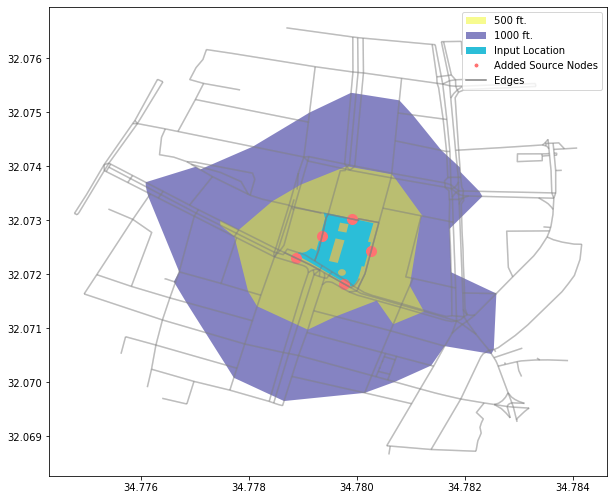

In [3]:
iso = il.OsmIsolines(poly, metric='distance', values=[500, 1000],unit = 'ft', network_type='walk', knn= 3)
iso.plot_isolines( figsize = (10,10))

## 2. Using a Shapely MultiPolygon as a location input
Note the the output isolines will be separated only of the polygon parts, and their isoline boundaries are completely separated 

In [4]:
from shapely.affinity import translate
multipolygon = MultiPolygon([translate(poly, 0.01, 0.01),
              poly])

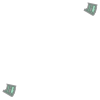

In [5]:
multipolygon

Finished downloading graph from OSM using osmnx, time elapsed: 8.334717750549316 seconds.


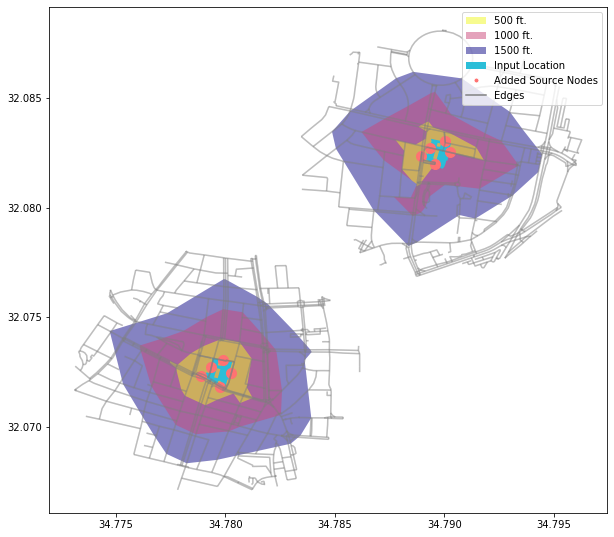

In [6]:
iso = il.OsmIsolines(multipolygon,
                           metric='distance',
                     values=[500, 1000, 1500],
                     unit = 'ft', network_type='walk',
                     )
iso.plot_isolines(figsize = (10, 10))

#### refining the boundaries

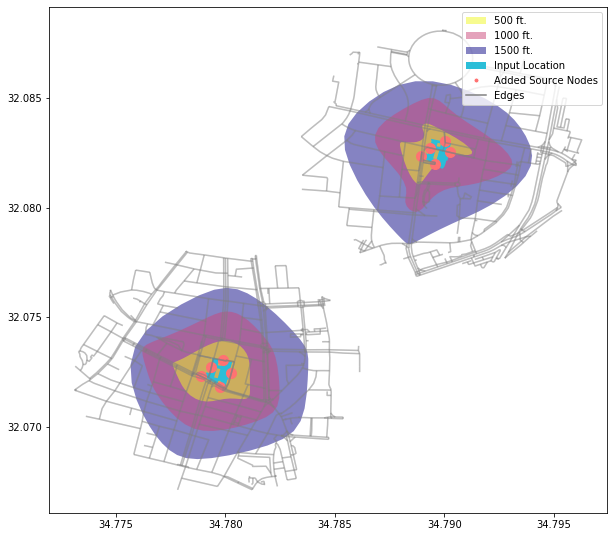

In [7]:
iso.change_isolines( smooth = True)
iso.plot_isolines(figsize = (10,10))

## 3. Using a Shapely MultiPoint as input
Note that due to the proximity of the points relative to the input distance this results in a unified isoline

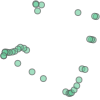

In [8]:
multipoint = MultiPoint([Point(i) for i in poly.exterior.coords])
multipoint

Finished downloading graph from OSM using osmnx, time elapsed: 3.3180577754974365 seconds.


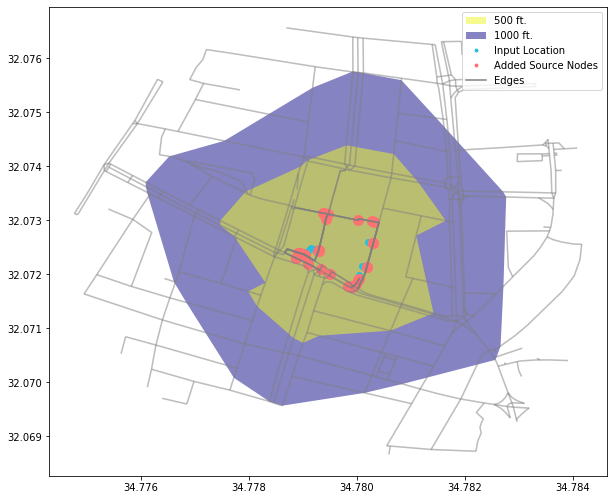

In [11]:
iso = il.OsmIsolines(multipoint,
                           metric='distance', values=[500,1000],unit = 'ft', network_type='walk')
iso.plot_isolines( figsize = (10,10))

## 4. Using Shapely MultiPoint with remote points

In [13]:
multipoint2 = MultiPoint([translate(poly.centroid, 0.01, 0.01),
              poly.centroid])

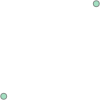

In [14]:
multipoint2 

Finished downloading graph from OSM using osmnx, time elapsed: 7.372683048248291 seconds.


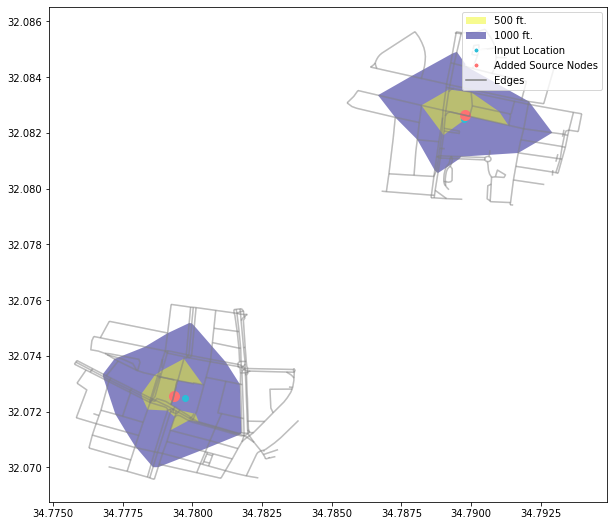

In [15]:
iso = il.OsmIsolines(multipoint2,
                           metric='distance', values=[500,1000],unit = 'ft', network_type='walk')
iso.plot_isolines(figsize = (10,10))

## 5. Using a Shapely LineString as input

In [16]:
line = LineString(multipoint2)

Finished downloading graph from OSM using osmnx, time elapsed: 3.871091365814209 seconds.


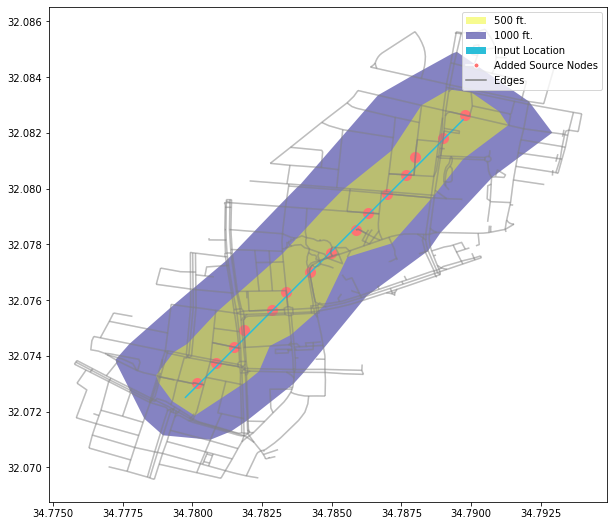

In [17]:
iso = il.OsmIsolines(line,
                           metric='distance', values=[500, 1000],unit = 'ft', network_type='walk')
iso.plot_isolines(figsize =(10,10))

## 6. Using a Shapely MultiLineString as input

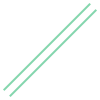

In [18]:
multiline = MultiLineString([line.parallel_offset(0.001),
                             line])
multiline

Finished downloading graph from OSM using osmnx, time elapsed: 6.497952461242676 seconds.


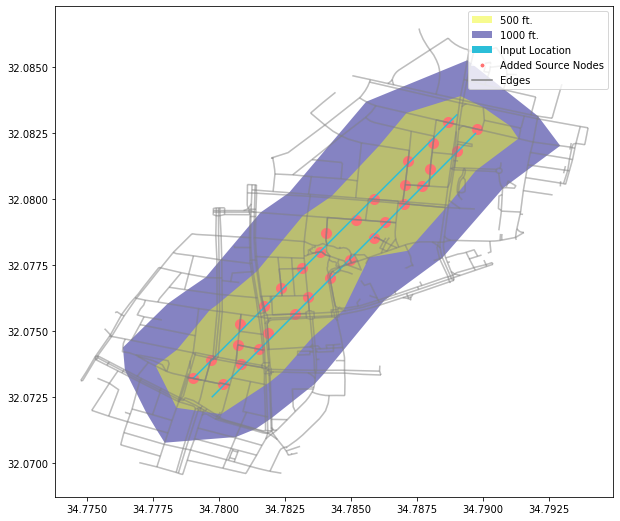

In [20]:
iso = il.OsmIsolines(multiline,
                           metric='distance', values=[500, 1000],unit = 'ft', network_type='walk')
iso.plot_isolines(figsize =(10,10))

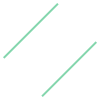

In [21]:
multiline2 = MultiLineString([line.parallel_offset(0.01),
                             line])
multiline2

Finished downloading graph from OSM using osmnx, time elapsed: 8.955984830856323 seconds.


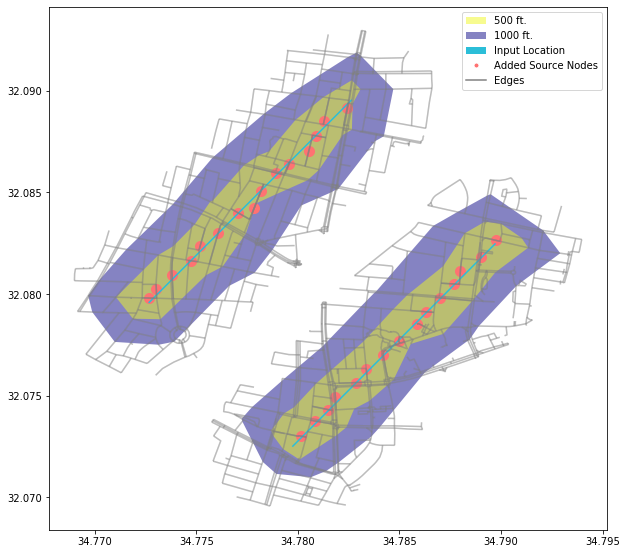

In [23]:
iso = il.OsmIsolines(multiline2,
                           metric='distance', values=[500, 1000],unit = 'ft', network_type='walk')
iso.plot_isolines(figsize =(10,10))

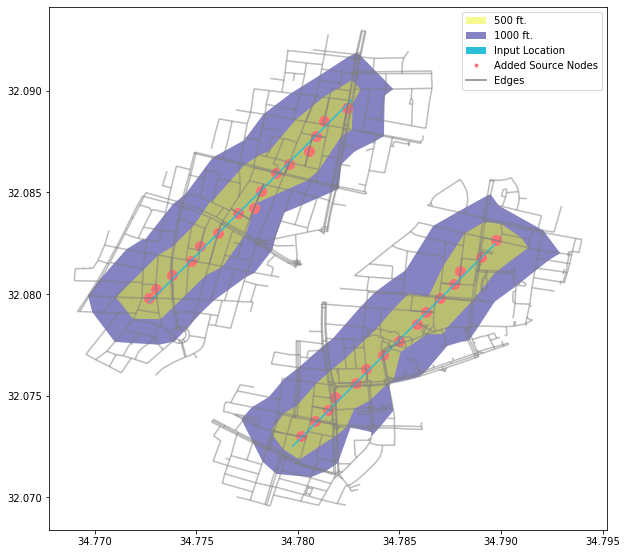

In [24]:
iso.change_isolines(knn = 50)
iso.plot_isolines(figsize =(10,10))